In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10000)

Ten real-valued features were computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


In [3]:
data_breast = pd.read_csv('data_breast.csv')

In [4]:
data_breast.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [5]:
data_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [ ]:
#Пропущенные значения только в последней непонятной колонке, которую можно сразу удалить

In [6]:
data_breast=data_breast.drop(['Unnamed: 32'], axis=1)
data_breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data_breast.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data_breast.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [ ]:
#средние значения показателей по группам отличаются

In [9]:
data_breast.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
#Убрать колонку id, так как это просто номер, который ни на что не влияет в дальнейшем анализе
data_breast=data_breast.drop(['id'], axis=1)
data_breast.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#Поменять значения в колонке diagnosis с 'M' и 'B' на 1 и 0
coder = {'M':1, 'B':0}
data_breast.diagnosis = data_breast.diagnosis.map(coder)

In [12]:
data_breast.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
data_breast.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
#Корреляция между переменными
correlation_matrix = data_breast.corr(method ='pearson').round(2)
correlation_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,-0.01,0.57,-0.01,0.56,0.55,-0.07,0.29,0.25,0.41,-0.01,0.08,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


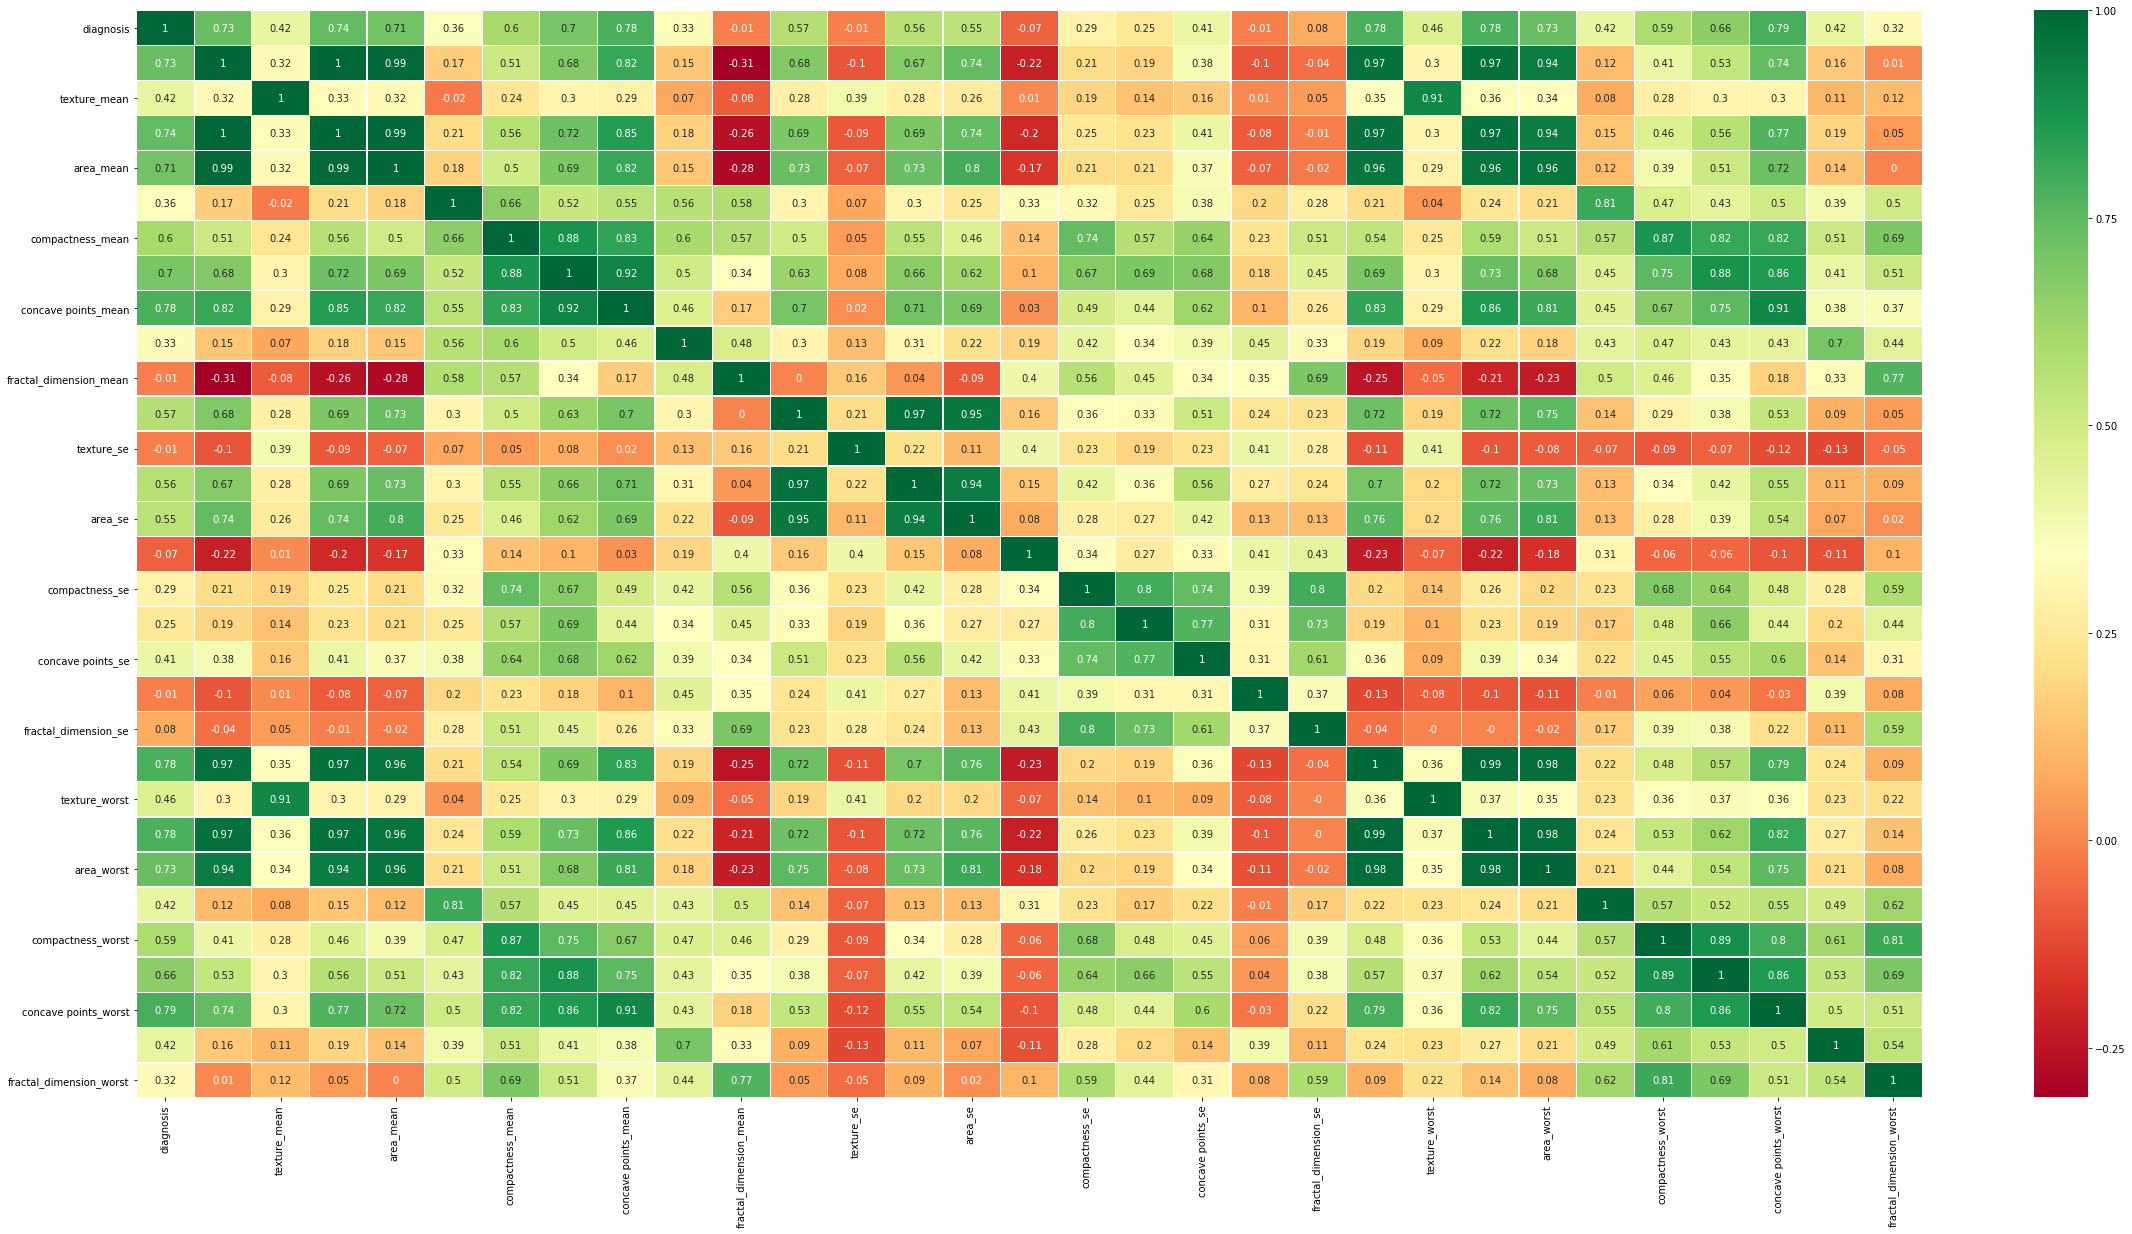

In [15]:
sns.heatmap(correlation_matrix,annot=True,cmap='RdYlGn',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(40,20)
plt.show()

In [ ]:
#graph = sns.pairplot(data=data_breast ,plot_kws={'alpha':0.2},hue='diagnosis')
#тут должен быть догло загружающийся график, который будт отдельным файлом

In [ ]:
#graph.savefig("lab.png")

In [ ]:
#Очень много коррелирубщих и влияющих друг на друга переменных. Так как в формулах расчета одних переменных (например площадь),
#участвуют другие (например радиус). И чем больше радиус, тем больше площадь.


In [ ]:
#Судя по матрице больше всего с diagnosis каррелируют (возьму значение больше 0,6):
#radius_mean
#perimeter_mean
#area_mean
#compactness_mean
#concavity_mean
#concave points_mean
#radius_worst
#perimeter_worst
#area_worst
#concavity_worst
#concave points_worst

In [15]:
data_breast_b_cor=data_breast[['diagnosis','radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean',\
            'concave points_mean','radius_worst','perimeter_worst','area_worst','concavity_worst','concave points_worst']]

D:\Miniconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Miniconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


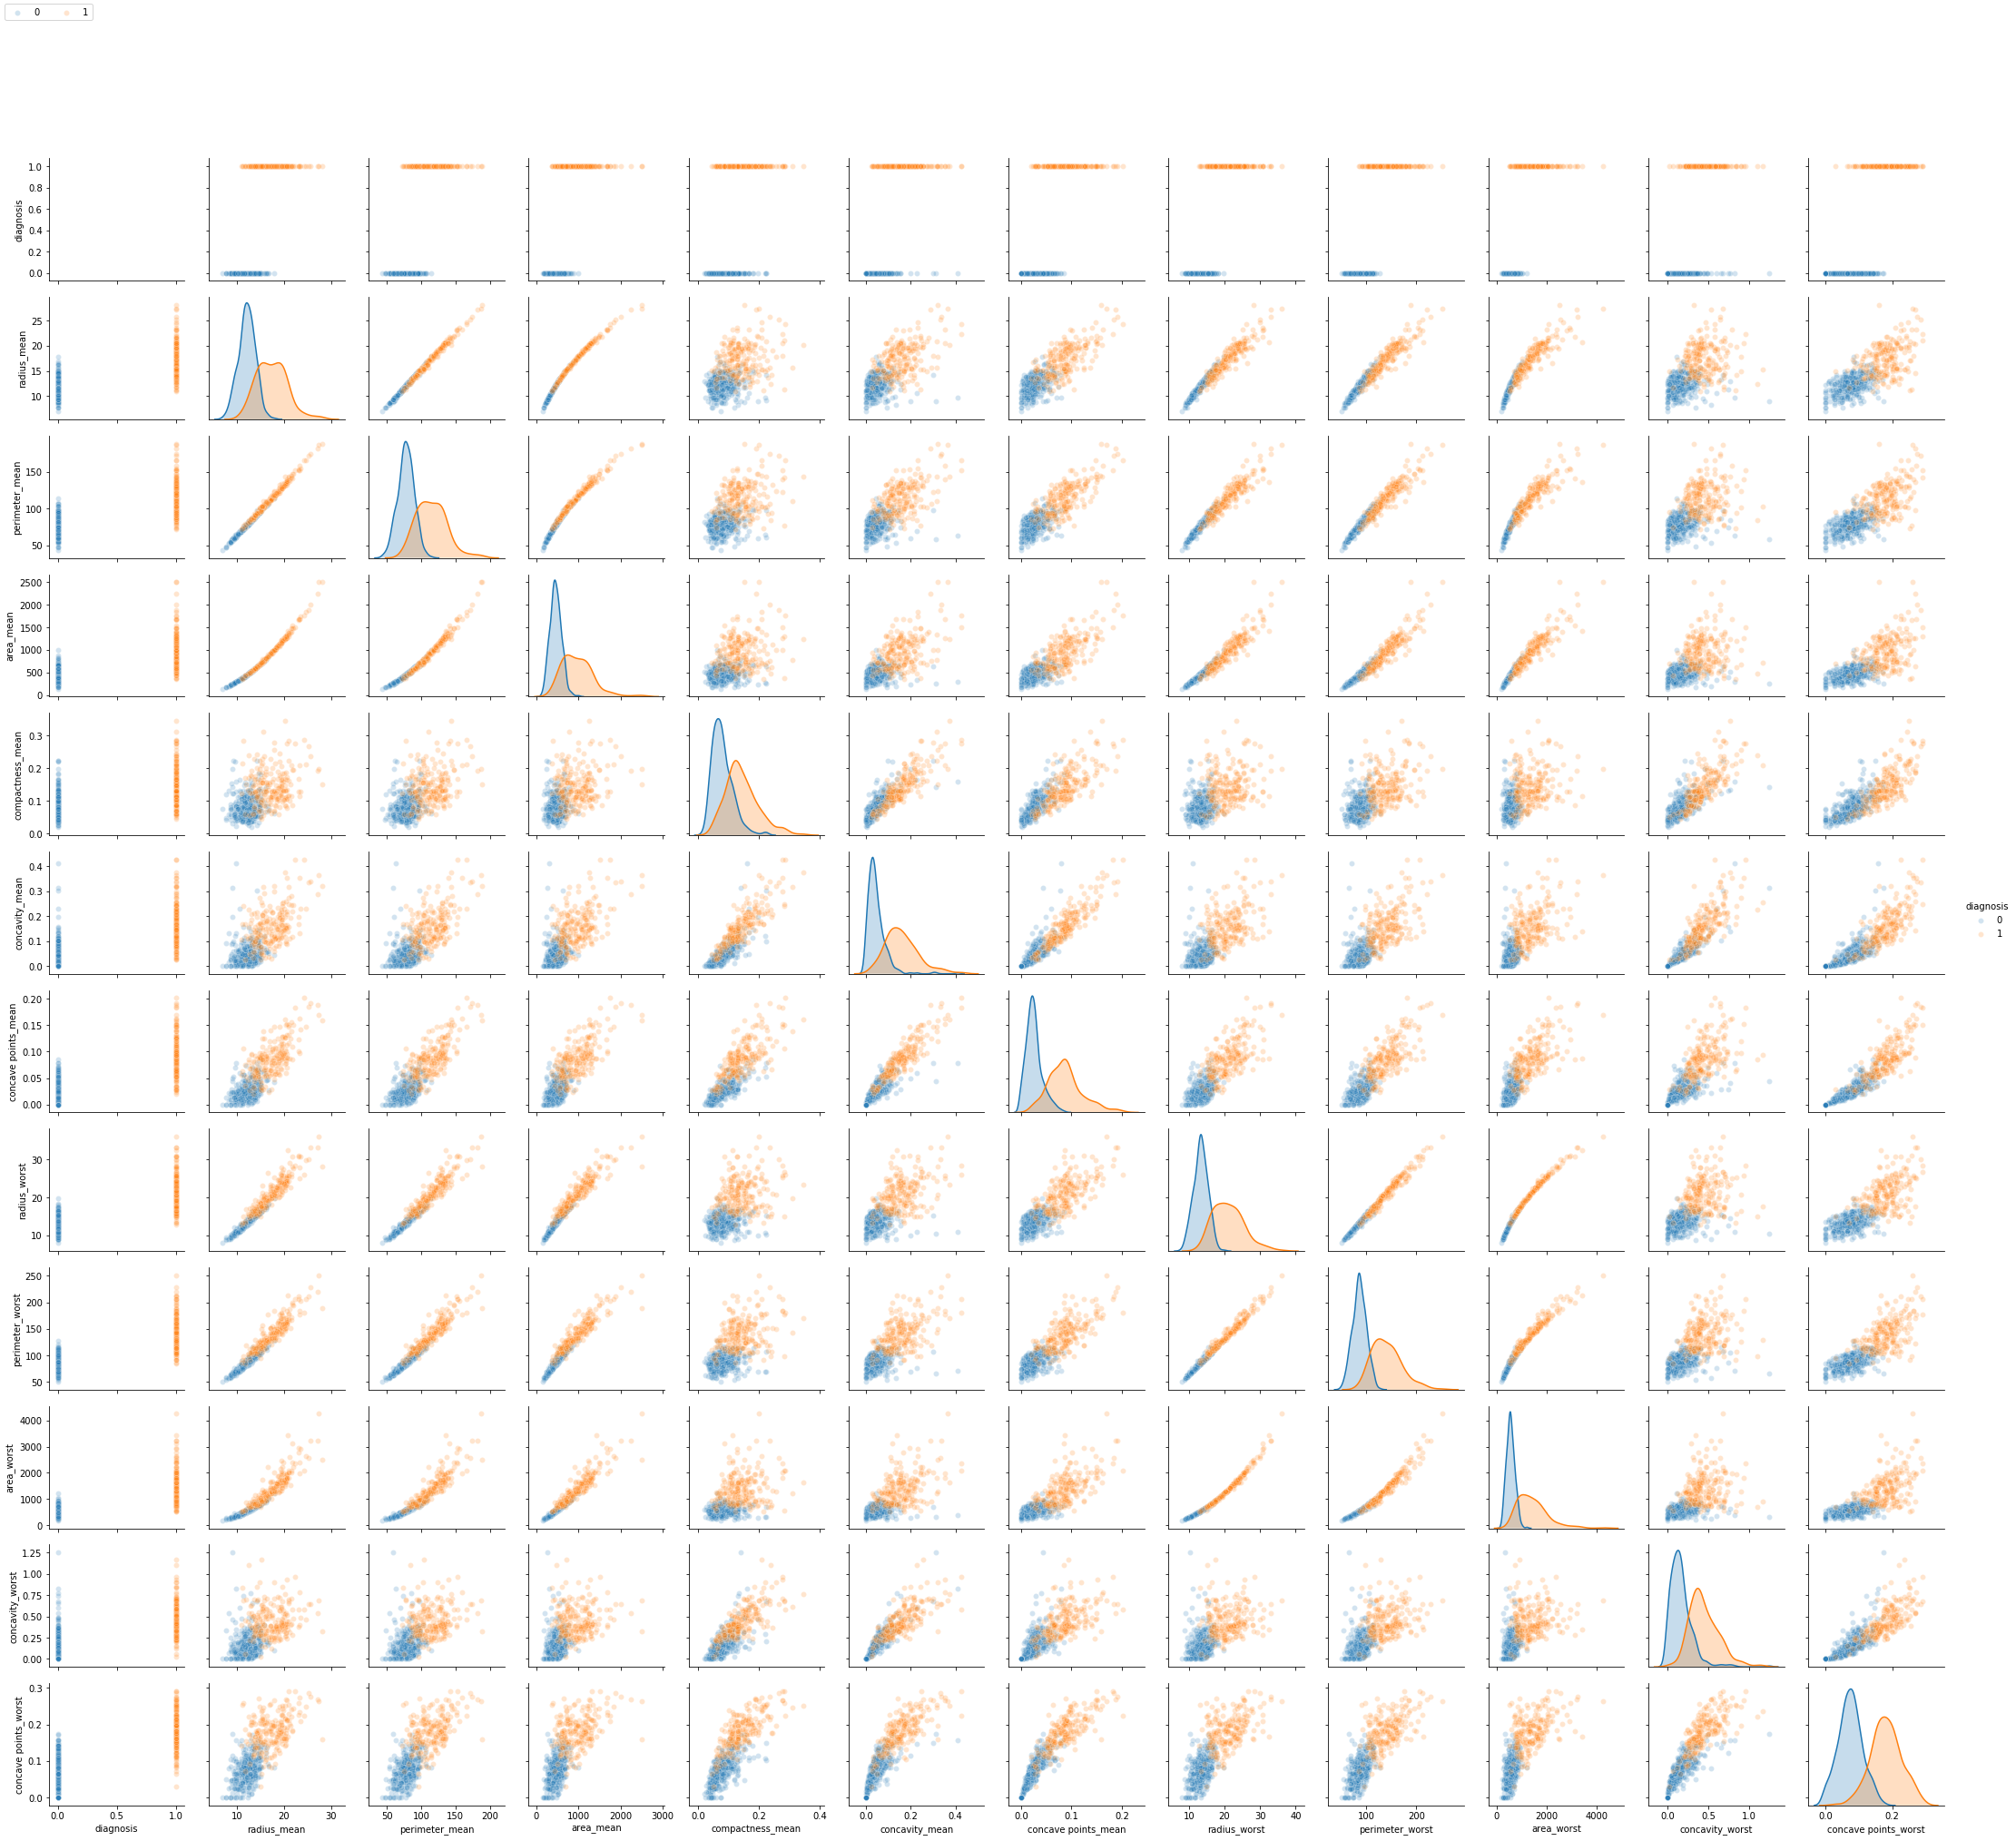

In [16]:
#Здесь я возьму только те переменные, которые больше всего кореллировали с diagnosis:
#radius_mean
#perimeter_mean
#area_mean
#compactness_mean
#concavity_mean
#concave points_mean
#radius_worst
#perimeter_worst
#area_worst
#concavity_worst
#concave points_worst
g=sns.pairplot(data=data_breast_b_cor,plot_kws={'alpha':0.2},hue='diagnosis')
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=2)
g.fig.subplots_adjust(top=0.92, bottom=0.08)

In [ ]:
#Синие точки - 0 (это В - доброкачественные)
#Оранжевые - 1 (это М - злокачественные)
#Визуально распределения значений всех параметров сильно отличается в зависимости от того, 
#к какому классу принадлежали значения параметров
#Для "доброкачественных" параметров свойственен небольшой разброс данных относительно среднего значения
#Для "злокачественный" параметров наоборот разброс значений относительно среднего существенно выше. 
#При этом средние значения между "доброкачественными" и "злокачественными" визуально отличаются

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import RFECV

In [41]:
#Разделение данных на test (20%) и train (80%)
X_train, X_test, y_train, y_test = train_test_split(data_breast.iloc[:,1:], data_breast['diagnosis'], train_size = .8 )

In [42]:
#Перед построением модели необходимо нормализовать данные
norm = Normalizer()

norm.fit(X_train)

#Нормализация test и train наборов
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [43]:
X_train_norm

array([[1.43713222e-02, 1.42645804e-02, 9.18561350e-02, ...,
        7.71936989e-05, 2.26486604e-04, 5.96007164e-05],
       [1.56808952e-02, 2.33763731e-02, 1.02107031e-01, ...,
        1.19092654e-04, 4.34426035e-04, 1.10732732e-04],
       [1.67315374e-02, 2.90910147e-02, 1.09119331e-01, ...,
        1.61850299e-04, 3.45420767e-04, 1.39863881e-04],
       ...,
       [1.20626821e-02, 2.60671997e-02, 8.05473363e-02, ...,
        1.56434267e-04, 2.72789050e-04, 9.35187974e-05],
       [1.55872607e-02, 1.47262714e-02, 1.00981744e-01, ...,
        1.13494043e-04, 2.41524270e-04, 8.11007189e-05],
       [1.61427312e-02, 2.03320647e-02, 1.03328531e-01, ...,
        7.24980469e-05, 4.52046645e-04, 8.85780635e-05]])

In [44]:
#Вариант использования логистической регрессии и метода рекурсивного исключения признаков (recursive feature elimination, RFE)
#для отбора переменных:
model_log_reg_sel = LogisticRegression()

In [45]:
#Отбор переменных и обучение модели
selector = RFECV(model_log_reg_sel, cv = 5, scoring='accuracy')
selector.fit(X_train_norm, y_train)

D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages

D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages

D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda\lib\site-packages

RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [46]:
#количество отобранных переменных
selector.n_features_

9

In [47]:
#список отобранных переменных
[i for i in list(X_train.columns[selector.support_])]

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst']

In [63]:
selector.set_params

<bound method BaseEstimator.set_params of RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)>

In [ ]:
selector.ranking_

In [49]:
y_pred_proba=selector.predict_proba(X_test_norm)

In [50]:
y_pred=selector.predict(X_test_norm)

In [51]:
for i in zip(y_pred_proba[:,1], y_pred,y_test):
    print(i)

(0.32421011201346983, 0, 0)
(0.3528507371460364, 0, 0)
(0.3425560696254409, 0, 0)
(0.5410980393567274, 1, 1)
(0.3030164508133704, 0, 0)
(0.4136777318776197, 0, 0)
(0.27432638301620516, 0, 0)
(0.2893530300665558, 0, 0)
(0.26410147568551934, 0, 0)
(0.49986340011988056, 0, 1)
(0.2624217167616635, 0, 0)
(0.2813382041155734, 0, 0)
(0.3393417007695062, 0, 0)
(0.3323305849007502, 0, 0)
(0.28614335708800986, 0, 0)
(0.7154798121497359, 1, 1)
(0.642606596288645, 1, 1)
(0.3721288844345615, 0, 0)
(0.2597700801688456, 0, 0)
(0.5373714871595275, 1, 1)
(0.4014721426104891, 0, 0)
(0.5748876881915994, 1, 1)
(0.41227584019363556, 0, 0)
(0.43210636639083805, 0, 1)
(0.28612419841893044, 0, 0)
(0.3847677817568736, 0, 0)
(0.3675646588302132, 0, 1)
(0.4644623481942987, 0, 1)
(0.3253523633563173, 0, 0)
(0.5813543617115025, 1, 1)
(0.4245226316024438, 0, 0)
(0.3097848096236328, 0, 0)
(0.44368455245346744, 0, 1)
(0.41444213832488036, 0, 0)
(0.33772848564163815, 0, 0)
(0.3275140417002617, 0, 0)
(0.529533396201570

In [52]:
score_train = selector.score(X_train_norm, y_train)
print(score_train)

0.7824175824175824


In [53]:
#точность модели (accuracy) с использованием RFE:
score = selector.score(X_test_norm, y_test)
print(score)

0.8157894736842105


In [54]:
#Проверка качества классификации
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        76
           1       1.00      0.45      0.62        38

    accuracy                           0.82       114
   macro avg       0.89      0.72      0.75       114
weighted avg       0.86      0.82      0.79       114



In [ ]:
#В случае "доброкачественных" клеток, модель нашла 100 % "пололожительных" объектов, при этом 22% объектов оказались
#"ложноположительными". В случае со "злокачественными" объектами модель нашла всего 45% от всех "злокачественных".
#Но при этом все найденные "злокачественные" действительно "злокачественные"


In [ ]:
#Модель с использованием Random Forest Classifier

In [55]:
cols = list(filter(lambda x: x in X_test.columns, X_train.columns))

In [56]:
clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0)\
.fit(X_train_norm, y_train)

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
y_RFC_train_predict = clf.predict(X_train_norm)


roc_auc_train = np.round(roc_auc_score(y_train, y_RFC_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  1.0


In [59]:
y_RFC_test_predict = clf.predict(X_test_norm)


roc_auc_test = np.round(roc_auc_score(y_test, y_RFC_test_predict), 2)
print("Test: ", roc_auc_test)

Test:  0.97


In [60]:
accuracy_score(y_test, y_RFC_test_predict)

0.9649122807017544

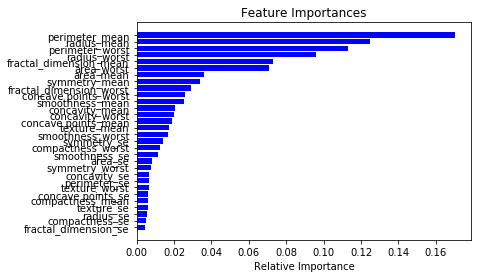

In [61]:
features = X_train.columns
importances = clf.feature_importances_

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [62]:
#Проверка качества классификации
print(classification_report(y_test,y_RFC_test_predict))  

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.93      0.97      0.95        38

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [ ]:
#Модель на основе Random Forest предсказывает значение таргет переменной значительно точнее.
#Наиболее значимые переменные: 
#'perimeter_mean', 
#'radius_mean', 
#'perimeter_worst', 
#'radius_worst', 
#'area_worst', 
#'fractal_dimension_mean'

In [ ]:
#Можно сравнить их со списком переменных, которые я отобрала ранее на основе корреляции
#radius_mean +
#perimeter_mean +
#area_mean
#compactness_mean
#concavity_mean
#concave points_mean
#radius_worst +
#perimeter_worst +
#area_worst +
#concavity_worst
#concave points_worst
